# **COVID-19 Vaccination Progress** 

Introduction here.

## Data Preprocessing
- Importing libraries
- Reading CSV to pandas
- Previewing datasets
- Looking up information about datasets
- Checking shape of datasets
- Checking for null values
- Checking for duplicated values
- Checking for unique values

### *Importing libraries*

In [7]:
# import libraries that will be used in this notebook

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [8]:
plt.style.use('seaborn-darkgrid')

### *Read CSV to pandas*

In [9]:
# read dataset (CSV) to pandas dataframe 

# factors considered in this study 
political_regimes = pd.read_csv('data/political-regimes.csv') 
gdp = pd.read_csv('data/gdp-per-capita.csv')
human_rights_scores = pd.read_csv('data/human-rights-scores.csv')

# population statistics
population_2020 = pd.read_csv('data/population_by_country_2020.csv')

# COVID-19 vaccination by the numbers
fully_vaccinated_individuals = pd.read_csv('data/share-people-fully-vaccinated-covid.csv')

datasets = [political_regimes,gdp,human_rights_scores,population_2020,fully_vaccinated_individuals]
datasets_name = ['political_regimes','gdp','human_rights_scores','population_2020','fully_vaccinated_individuals']

### *Preview dataset*

In [10]:
# previewing first five values of the dataset
for i, dataset in enumerate(datasets):
    dataset_name = datasets_name[i].upper()
    
    print(f'\n\n====={dataset_name}=====\n')
    display(dataset.head())



=====POLITICAL_REGIMES=====



,Entity,Code,Year,Political regime
0,Afghanistan,AFG,1789,0
1,Afghanistan,AFG,1790,0
2,Afghanistan,AFG,1791,0
3,Afghanistan,AFG,1792,0
4,Afghanistan,AFG,1793,0




=====GDP=====



,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117




=====HUMAN_RIGHTS_SCORES=====



,Entity,Code,Year,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
0,Afghanistan,AFG,1946,0.690479
1,Afghanistan,AFG,1947,0.739823
2,Afghanistan,AFG,1948,0.787035
3,Afghanistan,AFG,1949,0.816707
4,Afghanistan,AFG,1950,0.850675




=====POPULATION_2020=====



,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %




=====FULLY_VACCINATED_INDIVIDUALS=====



,Entity,Code,Day,people_fully_vaccinated_per_hundred,145609-annotations
0,Afghanistan,AFG,2021-05-11,0.14,NaN
1,Afghanistan,AFG,2021-05-20,0.19,NaN
2,Afghanistan,AFG,2021-05-24,0.24,NaN
3,Afghanistan,AFG,2021-05-26,0.28,NaN
4,Afghanistan,AFG,2021-05-27,0.29,NaN


### *Information on dataset*

In [11]:
#shows the non-null count and data type of each variable in the datasets 
for i,dataset in enumerate(datasets):
    dataset_name = datasets_name[i].upper()
    
    print(f'\n\n ====={dataset_name}=====\n')
    dataset.info()



 =====POLITICAL_REGIMES=====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30283 entries, 0 to 30282
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Entity            30283 non-null  object
 1   Code              29677 non-null  object
 2   Year              30283 non-null  int64 
 3   Political regime  30283 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 946.5+ KB


 =====GDP=====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7109 non-null   object 
 1   Code                                                 5729 non-null   object 
 2   Year                                                 7109 non-null   int64 

### *Shape of dataset*

In [12]:
for i,dataset in enumerate(datasets):
    dataset_name = datasets_name[i].upper()
    row = dataset.shape[0]
    column = dataset.shape[1]
    shape = dataset.shape
    
    print(f'{dataset_name}: \n rows: {row}\n columns: {dataset.shape[1]}\n {shape}\n')

POLITICAL_REGIMES: 
 rows: 30283
 columns: 4
 (30283, 4)

GDP: 
 rows: 7109
 columns: 4
 (7109, 4)

HUMAN_RIGHTS_SCORES: 
 rows: 11717
 columns: 4
 (11717, 4)

POPULATION_2020: 
 rows: 235
 columns: 11
 (235, 11)

FULLY_VACCINATED_INDIVIDUALS: 
 rows: 36190
 columns: 5
 (36190, 5)



### *Checking for null values*

In [13]:
# proportion of null values in respective columns

for i,dataset in enumerate(datasets): # iterate over list of datasets
    null_value_data = {'null count': dataset.isnull().sum(),'total':dataset.shape[0], '%':(dataset.isnull().sum()/dataset.shape[0]*100).round(2)}
    
    null_value_dataset = null_value_data
    
    null_value_dataset_to_dataframe = pd.DataFrame(null_value_dataset)
    
    dataset_name = datasets_name[i].upper()
    
    print(f'\n ====={dataset_name}=====')
    display(null_value_dataset_to_dataframe)


 =====POLITICAL_REGIMES=====


,null count,total,%
Entity,0,30283,0.0
Code,606,30283,2.0
Year,0,30283,0.0
Political regime,0,30283,0.0



 =====GDP=====


,null count,total,%
Entity,0,7109,0.00
Code,1380,7109,19.41
Year,0,7109,0.00
"GDP per capita, PPP (constant 2017 international $)",0,7109,0.00



 =====HUMAN_RIGHTS_SCORES=====


,null count,total,%
Entity,0,11717,0.0
Code,0,11717,0.0
Year,0,11717,0.0
"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)",0,11717,0.0



 =====POPULATION_2020=====


,null count,total,%
Country (or dependency),0,235,0.00
Population (2020),0,235,0.00
Yearly Change,0,235,0.00
Net Change,0,235,0.00
Density (P/Km²),0,235,0.00
Land Area (Km²),0,235,0.00
Migrants (net),34,235,14.47
Fert. Rate,0,235,0.00
Med. Age,0,235,0.00
Urban Pop %,0,235,0.00



 =====FULLY_VACCINATED_INDIVIDUALS=====


,null count,total,%
Entity,0,36190,0.00
Code,5691,36190,15.73
Day,0,36190,0.00
people_fully_vaccinated_per_hundred,0,36190,0.00
145609-annotations,35068,36190,96.90


### *Checking for duplicated values*

In [14]:
for i,dataset in enumerate(datasets): # iterate over list of datasets
    dataset_name = datasets_name[i].upper()
    general_duplicate_rows = dataset.duplicated().sum()
    total_rows = len(dataset)
    
    print(f'\n====={dataset_name}=====\nDuplicated rows: {general_duplicate_rows}\nTotal rows: {total_rows}')
    


=====POLITICAL_REGIMES=====
Duplicated rows: 0
Total rows: 30283

=====GDP=====
Duplicated rows: 0
Total rows: 7109

=====HUMAN_RIGHTS_SCORES=====
Duplicated rows: 0
Total rows: 11717

=====POPULATION_2020=====
Duplicated rows: 0
Total rows: 235

=====FULLY_VACCINATED_INDIVIDUALS=====
Duplicated rows: 0
Total rows: 36190


In [15]:
#checking for rows that have duplicated country values
for i,dataset in enumerate(datasets):
    dataset_name = datasets_name[i].upper()
    
    if 'Entity' in dataset.columns:
        country_duplicate_rows = dataset.duplicated(subset=['Entity']).sum() #to remove population_2020 since it neither has the column 'Entity' nor does it have duplicated country values
        total_rows = len(dataset)
        proportion_rows = (country_duplicate_rows/total_rows)*100
    
        print(f'\n====={dataset_name}=====\nDuplicated country rows: {country_duplicate_rows}\nTotal rows: {total_rows}\n% duplicated rows: {proportion_rows.round(2)}')
    


=====POLITICAL_REGIMES=====
Duplicated country rows: 30084
Total rows: 30283
% duplicated rows: 99.34

=====GDP=====
Duplicated country rows: 6869
Total rows: 7109
% duplicated rows: 96.62

=====HUMAN_RIGHTS_SCORES=====
Duplicated country rows: 11516
Total rows: 11717
% duplicated rows: 98.28

=====FULLY_VACCINATED_INDIVIDUALS=====
Duplicated country rows: 35954
Total rows: 36190
% duplicated rows: 99.35


### *Checking unique values*

In [16]:
# unique values in each column of respective dataset 

for i,dataset in enumerate(datasets): # iterates through list of datasets to be used in this study
    variable_count = len(dataset.columns)
    dataset_name = datasets_name[i].upper()
    
    print(f'\n\n====={dataset_name}=====')
    
    while variable_count: # iterates through columns in each dataset 
        unique_values = dataset.iloc[:,-variable_count].unique()
        column_name = dataset.columns[-variable_count].upper()
        
        print(f'\n-----{column_name}-----\n')
        print(unique_values)
        
        variable_count-=1
    



=====POLITICAL_REGIMES=====

-----ENTITY-----

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Baden' 'Bahrain' 'Bangladesh'
 'Barbados' 'Bavaria' 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunswick' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'German Democratic Republic' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hanover'
 'Hesse-Darmstadt' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'It

## Data Cleaning
- Renaming/dropping columns
- Dropping duplicate values
- Dropping non-sovereign states
- Merging datasets 

### *Renaming/dropping columns*

In [17]:
# political_regimes
new_columns={'Entity':'country',
             'Political regime':'political_regime'}
columns_to_drop=['Code','Year']

renamed_dropped_political_regimes = (political_regimes).drop(columns=columns_to_drop).rename(columns=new_columns)
renamed_dropped_political_regimes.head()

,country,political_regime
0,Afghanistan,0
1,Afghanistan,0
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0


In [18]:
# gdp
new_columns={'Entity':'country',
             'GDP per capita, PPP (constant 2017 international $)':'gdp_per_capita'}
columns_to_drop=['Code','Year']

renamed_dropped_gdp = (gdp).drop(columns=columns_to_drop).rename(columns=new_columns)
renamed_dropped_gdp.head()

,country,gdp_per_capita
0,Afghanistan,1189.784668
1,Afghanistan,1235.810063
2,Afghanistan,1200.278013
3,Afghanistan,1286.793659
4,Afghanistan,1315.789117


In [19]:
# human_rights_scores
new_columns={'Entity':'country',
             'Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)':'human_rights_score'}
columns_to_drop=['Year','Code']

renamed_dropped_human_rights_score = (human_rights_scores).drop(columns=columns_to_drop).rename(columns=new_columns)
renamed_dropped_human_rights_score.head()

,country,human_rights_score
0,Afghanistan,0.690479
1,Afghanistan,0.739823
2,Afghanistan,0.787035
3,Afghanistan,0.816707
4,Afghanistan,0.850675


In [20]:
# population_2020
columns_to_drop = ['Yearly Change','Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']
new_columns = {'Country (or dependency)':'country',
               'Population (2020)':'population'}

renamed_dropped_population_2020 = (population_2020).drop(columns=columns_to_drop).rename(columns=new_columns).sort_values(by='country').reset_index().drop(columns='index')
renamed_dropped_population_2020.head()

,country,population
0,Afghanistan,39074280
1,Albania,2877239
2,Algeria,43984569
3,American Samoa,55169
4,Andorra,77287


In [21]:
# fully_vaccinated_individuals
new_columns={'Entity':'country','people_fully_vaccinated_per_hundred':'fully_vaccinated_percent'}
columns_to_drop=['Code','145609-annotations','Day']

renamed_dropped_fully_vaccinated_individuals = (fully_vaccinated_individuals).drop(columns=columns_to_drop).rename(columns=new_columns)
renamed_dropped_fully_vaccinated_individuals.head()

,country,fully_vaccinated_percent
0,Afghanistan,0.14
1,Afghanistan,0.19
2,Afghanistan,0.24
3,Afghanistan,0.28
4,Afghanistan,0.29


### *Dropping duplicate values*

In [22]:
sans_duplicates_political_regimes = renamed_dropped_political_regimes.drop_duplicates(subset='country',keep='last').reset_index().drop(columns='index')

display(sans_duplicates_political_regimes.head())
print(f'Number of rows: {len(sans_duplicates_political_regimes)}')

,country,political_regime
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Angola,1
4,Argentina,2


Number of rows: 199


In [23]:
sans_duplicates_gdp = renamed_dropped_gdp.drop_duplicates(subset='country',keep='last').reset_index().drop(columns='index')

display(sans_duplicates_gdp.head())
print(f'Number of rows: {len(sans_duplicates_gdp)}')

,country,gdp_per_capita
0,Afghanistan,1978.961579
1,Africa Eastern and Southern,3387.594670
2,Africa Western and Central,4003.158913
3,Albania,13295.410885
4,Algeria,10681.679297


Number of rows: 240


In [24]:
sans_duplicates_human_rights_score = renamed_dropped_human_rights_score.drop_duplicates(subset='country',keep='last').reset_index().drop(columns='index')

display(sans_duplicates_human_rights_score.head())
print(f'Number of rows: {len(sans_duplicates_human_rights_score)}')

,country,human_rights_score
0,Afghanistan,-2.311017
1,Albania,0.851180
2,Algeria,0.354197
3,Andorra,4.221865
4,Angola,-0.388863


Number of rows: 201


In [25]:
sans_duplicates_fully_vaccinated_individuals = renamed_dropped_fully_vaccinated_individuals.drop_duplicates(subset='country',keep='last').reset_index().drop(columns='index')

display(sans_duplicates_fully_vaccinated_individuals.head())
print(f'Number of rows: {len(sans_duplicates_fully_vaccinated_individuals)}')

,country,fully_vaccinated_percent
0,Afghanistan,9.42
1,Africa,9.29
2,Albania,35.89
3,Algeria,12.57
4,Andorra,65.35


Number of rows: 236


### *Dropping non-sovereign states*

In [26]:
sovereign_states = ['Afghanistan','Albania','Algeria','Angola','Antigua and Barbuda','Argentina','Armenia','Aruba',
                    'Australia','Austria','Azerbaijan','Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium',
                    'Belize','Benin','Bermuda','Bhutan','Bolivia','Bosnia and Herzegovina','Botswana','Brazil','Brunei',
                    'Bulgaria','Burkina Faso','Burundi' 'Cambodia','Cameroon','Canada','Cape Verde','Central African Republic',
                    'Chad','Chile','China','Colombia','Comoros','Congo','Costa Rica',"Cote d'Ivoire",'Croatia','Cyprus','Czechia',
                    'Democratic Republic of Congo','Denmark','Djibouti','Dominica','Dominican Republic','Ecuador','Egypt','El Salvador',
                    'Equatorial Guinea','Estonia','Eswatini','Ethiopia','Fiji''Finland','France','Gabon','Gambia','Georgia','Germany','Ghana',
                    'Greece','Grenada','Guatemala','Guinea','Guinea-Bissau','Guyana','Haiti','Honduras','Hungary','Iceland','India','Indonesia',
                    'Iran','Iraq','Ireland','Israel','Italy','Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati','Kuwait','Kyrgyzstan','Laos',
                    'Lebanon','Lesotho','Liberia','Libya','Lithuania','Luxembourg','Madagascar','Malawi','Malaysia','Maldives','Mali','Malta','Marshall Islands',
                    'Mauritania','Mauritius','Mexico','Micronesia (country)','Moldova','Mongolia','Montenegro','Morocco','Mozambique','Myanmar','Namibia','Nauru',
                    'Nepal','Netherlands','New Zealand','Nicaragua','Niger','Nigeria','North Macedonia','Norway','Oman','Pakistan','Palau','Palestine','Panama',
                    'Papua New Guinea','Paraguay','Peru','Philippines','Poland','Portugal','Puerto Rico','Qatar','Romania','Russia','Rwanda','Saint Kitts and Nevis',
                    'Saint Lucia','Saint Vincent and the Grenadines','Samoa','San Marino','Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
                    'Sierra Leone','Singapore','Slovakia','Slovenia','Solomon Islands','Somalia','South Africa','South Korea','Spain','Sri Lanka','Sudan','Suriname',
                    'Sweden','Switzerland','Tajikistan','Tanzania','Thailand','Timor','Togo','Tonga','Trinidad and Tobago','Tunisia','Turkey','Turkmenistan','Tuvalu',
                    'Uganda','Ukraine','United Arab Emirates','United Kingdom','United States','Uruguay','Uzbekistan','Vanuatu','Vietnam','Zambia','Zimbabwe'
                    ] 
print(len(sovereign_states))

184


In [27]:
cleaned_political_regimes = sans_duplicates_political_regimes[sans_duplicates_political_regimes['country'].isin(sovereign_states)]
cleaned_political_regimes

,country,political_regime
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Angola,1
4,Argentina,2
...,...,...
190,Uzbekistan,1
191,Vanuatu,2
193,Vietnam,0
196,Zambia,1


In [28]:
cleaned_gdp = sans_duplicates_gdp[sans_duplicates_gdp['country'].isin(sovereign_states)]
cleaned_gdp

,country,gdp_per_capita
0,Afghanistan,1978.961579
3,Albania,13295.410885
4,Algeria,10681.679297
5,Angola,6198.083841
6,Antigua and Barbuda,17956.315716
...,...,...
234,Uzbekistan,6994.169412
235,Vanuatu,2762.791388
236,Vietnam,8200.331867
238,Zambia,3270.035112


In [29]:
cleaned_human_rights_score = sans_duplicates_human_rights_score[sans_duplicates_human_rights_score['country'].isin(sovereign_states)]
cleaned_human_rights_score

,country,human_rights_score
0,Afghanistan,-2.311017
1,Albania,0.851180
2,Algeria,0.354197
4,Angola,-0.388863
5,Antigua and Barbuda,1.335031
...,...,...
189,Uzbekistan,-0.588449
190,Vanuatu,2.312696
192,Vietnam,-0.373984
198,Zambia,-0.043186


In [30]:
cleaned_population_2020 = renamed_dropped_population_2020[renamed_dropped_population_2020['country'].isin(sovereign_states)]
cleaned_population_2020

,country,population
0,Afghanistan,39074280
1,Albania,2877239
2,Algeria,43984569
5,Angola,33032075
7,Antigua and Barbuda,98069
...,...,...
226,Uzbekistan,33551824
227,Vanuatu,308337
229,Vietnam,97490013
233,Zambia,18468257


In [31]:
cleaned_fully_vaccinated_individuals = sans_duplicates_fully_vaccinated_individuals[sans_duplicates_fully_vaccinated_individuals['country'].isin(sovereign_states)]
cleaned_fully_vaccinated_individuals

,country,fully_vaccinated_percent
0,Afghanistan,9.42
2,Albania,35.89
3,Algeria,12.57
5,Angola,11.58
7,Antigua and Barbuda,59.62
...,...,...
225,Uzbekistan,32.72
226,Vanuatu,16.03
228,Vietnam,57.44
234,Zambia,6.43


### *Merging datasets*

In [32]:
political_regime_N_gdp = cleaned_political_regimes.merge(cleaned_gdp,how='inner')
political_regime_N_gdp_N_human_rights_score = political_regime_N_gdp.merge(cleaned_human_rights_score,how='inner')
political_regime_N_gdp_N_human_rights_score_N_population = political_regime_N_gdp_N_human_rights_score.merge(cleaned_population_2020,how='inner')

dataset = political_regime_N_gdp_N_human_rights_score_N_population.merge(cleaned_fully_vaccinated_individuals,how='inner')

prime_dataset = dataset
prime_dataset = prime_dataset[['country','political_regime','human_rights_score','gdp_per_capita','population','fully_vaccinated_percent']]

display(prime_dataset)
prime_dataset.info()
prime_dataset.describe()

,country,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent
0,Afghanistan,1,-2.311017,1978.961579,39074280,9.42
1,Albania,2,0.851180,13295.410885,2877239,35.89
2,Algeria,1,0.354197,10681.679297,43984569,12.57
3,Angola,1,-0.388863,6198.083841,33032075,11.58
4,Argentina,2,0.784109,19686.523659,45267449,71.66
...,...,...,...,...,...,...
148,Uzbekistan,1,-0.588449,6994.169412,33551824,32.72
149,Vanuatu,2,2.312696,2762.791388,308337,16.03
150,Vietnam,0,-0.373984,8200.331867,97490013,57.44
151,Zambia,1,-0.043186,3270.035112,18468257,6.43


<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   153 non-null    object 
 1   political_regime          153 non-null    int64  
 2   human_rights_score        153 non-null    float64
 3   gdp_per_capita            153 non-null    float64
 4   population                153 non-null    int64  
 5   fully_vaccinated_percent  153 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 8.4+ KB


,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent
count,153.000000,153.000000,153.000000,1.530000e+02,153.000000
mean,1.633987,0.492086,20035.342022,4.874557e+07,42.308889
std,0.908669,1.511412,20594.633036,1.655670e+08,27.162765
min,0.000000,-2.470596,829.611429,9.845300e+04,0.480000
25%,1.000000,-0.467374,4706.570238,4.032294e+06,16.030000
50%,2.000000,0.409907,12536.941756,1.019141e+07,43.050000
75%,2.000000,1.368498,28384.987785,3.698562e+07,67.590000
max,3.000000,5.129846,110261.157353,1.440298e+09,91.270000


## Feature Engineering
- Categorizing political regimes
- Assigning regions
- Finalizing features

### *Categorizing political regimes*

In [46]:
prime_dataset.loc[:,'regime_type'] = prime_dataset.loc[:,'political_regime'].astype(str).replace({'0':'closed autocracy','1':'electoral autocracy','2':'electoral democracy','3':'liberal democracy'})
prime_dataset

,country,region,region_num,regime_type,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent
0,Afghanistan,asia,3,electoral autocracy,1,-2.311017,1978.961579,39074280,9.42
1,Albania,europe,5,electoral democracy,2,0.851180,13295.410885,2877239,35.89
2,Algeria,arab states,2,electoral autocracy,1,0.354197,10681.679297,43984569,12.57
3,Angola,africa,1,electoral autocracy,1,-0.388863,6198.083841,33032075,11.58
4,Argentina,south america,8,electoral democracy,2,0.784109,19686.523659,45267449,71.66
...,...,...,...,...,...,...,...,...,...
148,Uzbekistan,asia,3,electoral autocracy,1,-0.588449,6994.169412,33551824,32.72
149,Vanuatu,pacific,4,electoral democracy,2,2.312696,2762.791388,308337,16.03
150,Vietnam,asia,3,closed autocracy,0,-0.373984,8200.331867,97490013,57.44
151,Zambia,africa,1,electoral autocracy,1,-0.043186,3270.035112,18468257,6.43


### *Assigning Regions*

In [34]:
def country_region(country):
    africa = ['Angola','Burkina Faso','Benin','Botswana',
              'Congo','Cameroon','Central African Republic',
              'Ethiopia','Gabon','Ghana','Gambia','Guinea',
              'Equatorial Guinea','Guinea-Bissau','Kenya',
              'Liberia','Lesotho','Madagascar','Mali','Mauritius',
              'Malawi','Mozambique','Namibia','Niger','Nigeria',
              'Rwanda','Seychelles','Sierra Leone','Senegal',
              'Eswatini','Chad','Togo','Tanzania','Uganda',
              'South Africa','Zambia', 'Zimbabwe']
    
    arab_states = ['Bahrain','Djibouti','Algeria','Comoros',
                   'Morocco','Mauritania','Sudan','Somalia','Tunisia',]

    asia = ['Afghanistan','Azerbaijan','Bangladesh','Bhutan','China',
            'Indonesia','India','Japan','Kyrgyzstan','South Korea',
            'Kazakhstan','Laos','Sri Lanka','Myanmar','Mongolia',
            'Maldives','Malaysia','Nepal','Papua New Guinea',
            'Philippines','Pakistan','Singapore','Thailand',
            'Tajikistan','Turkmenistan','Uzbekistan','Vietnam']

    pacific = ['New Zealand','Solomon Islands','Australia','Vanuatu']
    
    europe = ['Albania','Armenia','Austria','Bosnia and Herzegovina',
              'Belgium','Bulgaria','Belarus','Switzerland','Cyprus',
              'Germany','Denmark','Estonia','Spain','France','United Kingdom',
              'Georgia','Greece','Croatia','Hungary','Ireland','Israel','Italy',
              'Lithuania','Luxembourg','Moldova','Malta','North Macedonia',
              'Montenegro','Netherlands','Norway','Poland','Portugal','Romania',
              'Slovakia','Slovenia','Sweden','Turkey','Russia','Iceland','Ukraine']

    middle_east = ['United Arab Emirates','Egypt','Iran','Iraq','Jordan',
               'Kuwait','Lebanon','Libya','Oman','Qatar','Saudi Arabia']

    north_america = [ 'United States','Canada']

    south_america = ['Argentina','Barbados','Bolivia','Brazil','Chile', 
                 'Colombia','Costa Rica','Dominican Republic','Ecuador',
                 'El Salvador','Guatemala','Guyana','Haiti','Honduras',
                 'Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru',
                 'Suriname','Trinidad and Tobago','Uruguay',] 
    
    if country in africa:
        return 'africa'
    elif country in arab_states:
        return 'arab states'
    elif country in asia:
        return 'asia'
    elif country in pacific:
        return 'pacific'
    elif country in europe:
        return 'europe'
    elif country in middle_east:
        return 'middle east'
    elif country in north_america:
        return 'north america'
    else:
        return 'south america'
    

prime_dataset.loc[:,'region'] = prime_dataset.loc[:,'country'].apply(country_region)
prime_dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_2792\1129329364.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prime_dataset.loc[:,'region'] = prime_dataset.loc[:,'country'].apply(country_region)


,country,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent,regime_type,region
0,Afghanistan,1,-2.311017,1978.961579,39074280,9.42,electoral autocracy,asia
1,Albania,2,0.851180,13295.410885,2877239,35.89,electoral democracy,europe
2,Algeria,1,0.354197,10681.679297,43984569,12.57,electoral autocracy,arab states
3,Angola,1,-0.388863,6198.083841,33032075,11.58,electoral autocracy,africa
4,Argentina,2,0.784109,19686.523659,45267449,71.66,electoral democracy,south america
...,...,...,...,...,...,...,...,...
148,Uzbekistan,1,-0.588449,6994.169412,33551824,32.72,electoral autocracy,asia
149,Vanuatu,2,2.312696,2762.791388,308337,16.03,electoral democracy,pacific
150,Vietnam,0,-0.373984,8200.331867,97490013,57.44,closed autocracy,asia
151,Zambia,1,-0.043186,3270.035112,18468257,6.43,electoral autocracy,africa


In [35]:
prime_dataset.loc[:,'region_num'] = prime_dataset.loc[:,'region'].replace({'africa':'1','arab states':'2','asia':'3','pacific':'4','europe':'5','middle east':'6','north america':'7','south america':'8'})
prime_dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_2792\4014931027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prime_dataset.loc[:,'region_num'] = prime_dataset.loc[:,'region'].replace({'africa':'1','arab states':'2','asia':'3','pacific':'4','europe':'5','middle east':'6','north america':'7','south america':'8'})


,country,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent,regime_type,region,region_num
0,Afghanistan,1,-2.311017,1978.961579,39074280,9.42,electoral autocracy,asia,3
1,Albania,2,0.851180,13295.410885,2877239,35.89,electoral democracy,europe,5
2,Algeria,1,0.354197,10681.679297,43984569,12.57,electoral autocracy,arab states,2
3,Angola,1,-0.388863,6198.083841,33032075,11.58,electoral autocracy,africa,1
4,Argentina,2,0.784109,19686.523659,45267449,71.66,electoral democracy,south america,8
...,...,...,...,...,...,...,...,...,...
148,Uzbekistan,1,-0.588449,6994.169412,33551824,32.72,electoral autocracy,asia,3
149,Vanuatu,2,2.312696,2762.791388,308337,16.03,electoral democracy,pacific,4
150,Vietnam,0,-0.373984,8200.331867,97490013,57.44,closed autocracy,asia,3
151,Zambia,1,-0.043186,3270.035112,18468257,6.43,electoral autocracy,africa,1


In [36]:
prime_dataset.loc[prime_dataset.region=='middle east','region_num'] = 6


### *Finalizing features*

In [37]:
prime_dataset = prime_dataset[['country','region','region_num','regime_type','political_regime','human_rights_score','gdp_per_capita','population','fully_vaccinated_percent']]
prime_dataset

,country,region,region_num,regime_type,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent
0,Afghanistan,asia,3,electoral autocracy,1,-2.311017,1978.961579,39074280,9.42
1,Albania,europe,5,electoral democracy,2,0.851180,13295.410885,2877239,35.89
2,Algeria,arab states,2,electoral autocracy,1,0.354197,10681.679297,43984569,12.57
3,Angola,africa,1,electoral autocracy,1,-0.388863,6198.083841,33032075,11.58
4,Argentina,south america,8,electoral democracy,2,0.784109,19686.523659,45267449,71.66
...,...,...,...,...,...,...,...,...,...
148,Uzbekistan,asia,3,electoral autocracy,1,-0.588449,6994.169412,33551824,32.72
149,Vanuatu,pacific,4,electoral democracy,2,2.312696,2762.791388,308337,16.03
150,Vietnam,asia,3,closed autocracy,0,-0.373984,8200.331867,97490013,57.44
151,Zambia,africa,1,electoral autocracy,1,-0.043186,3270.035112,18468257,6.43


### *Dataset to CSV*

In [38]:
prime_dataset.to_csv('prime-dataset.csv')

## Data Visualization and Analysis 
- Correlation

### *Correlation*

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Political Regime'),
  Text(0, 1.5, 'Human Rights Score'),
  Text(0, 2.5, 'GDP'),
  Text(0, 3.5, 'Population'),
  Text(0, 4.5, 'Fully Vaccinated')])

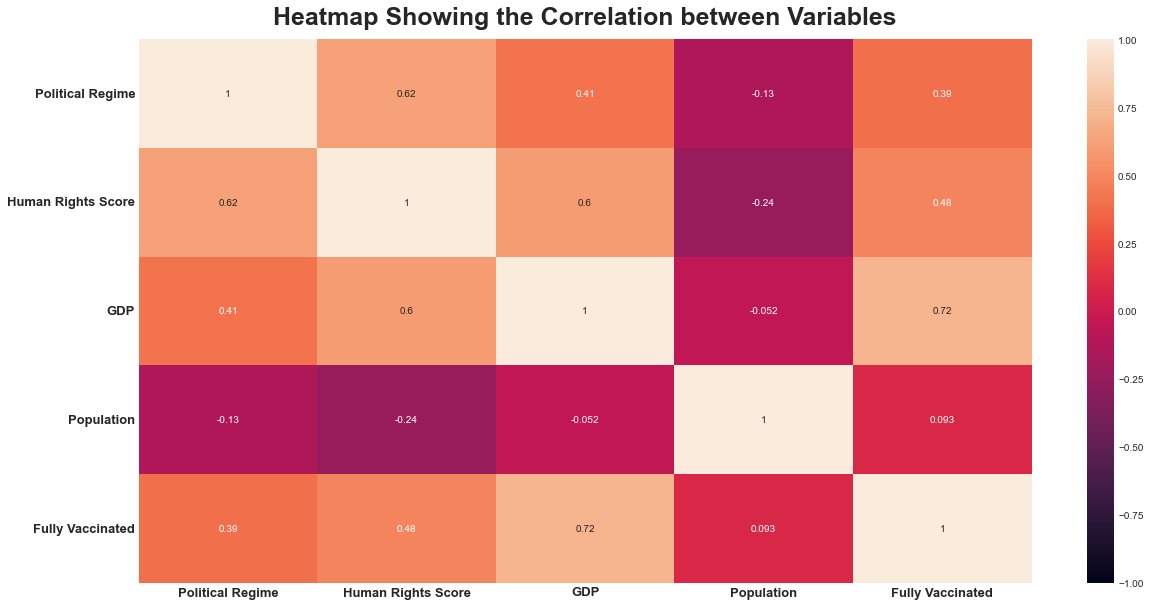

In [39]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

heatmap_correlation=sns.heatmap(prime_dataset.corr(),vmin=-1,vmax=1, annot=True)

ax.set_title('Heatmap Showing the Correlation between Variables',size=25, pad=15, fontdict={'fontweight':'bold'})
ax.set_yticklabels(['Political Regime','Human Rights Score','GDP','Population','Fully Vaccinated'], fontdict={'fontweight':'bold'},size=13)
ax.set_xticklabels(['Political Regime','Human Rights Score','GDP','Population','Fully Vaccinated'], fontdict={'fontweight':'bold'},size=13)

plt.yticks(rotation=0)

#### Analysis here
<strong> Strenght of Linear Relationship </strong>

Let's Assume the the Dependent Variable : total_vaccinations

| Absolute Value of Coefficient Correlation |  Strength  | Value |      Variable      |
| ----------------------------------------- |  --------  | ----- |      --------      | 
|                   0-0.2                   |  Very Weak |  0.0017 |  region_num  |   
|                                           |            |  0.12 | political_regime |
|                                           |            |  0.16 | human_rights_score|
|                                           |            | 0.0054      |gdp |
|                                           |            | 0.18 | people_fully_vaccinated_per_hundred|
|0.8-1.0                                    | Very Strong|  0.95 | population| 

Interpretation:
There is a strong correlation of the total vaccinations to population

* GDP, population,people_fully_vaccinated,  and Human Rights score are the only quantitative data you can use
* Political_regime and Regions are categorical variables
* DV is the total vaccinations

### *Histograms*

<AxesSubplot:xlabel='gdp_per_capita', ylabel='fully_vaccinated_percent'>

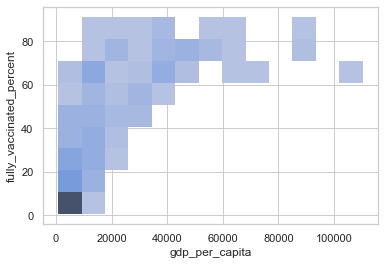

In [65]:
sns.histplot(data=prime_dataset, x='gdp_per_capita',y='fully_vaccinated_percent')

<AxesSubplot:xlabel='human_rights_score', ylabel='fully_vaccinated_percent'>

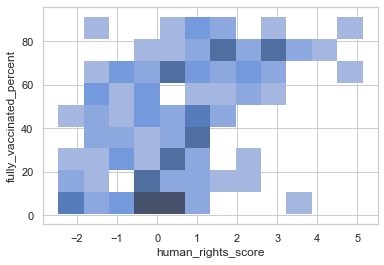

In [63]:
sns.histplot(data=prime_dataset,x='human_rights_score',y='fully_vaccinated_percent')

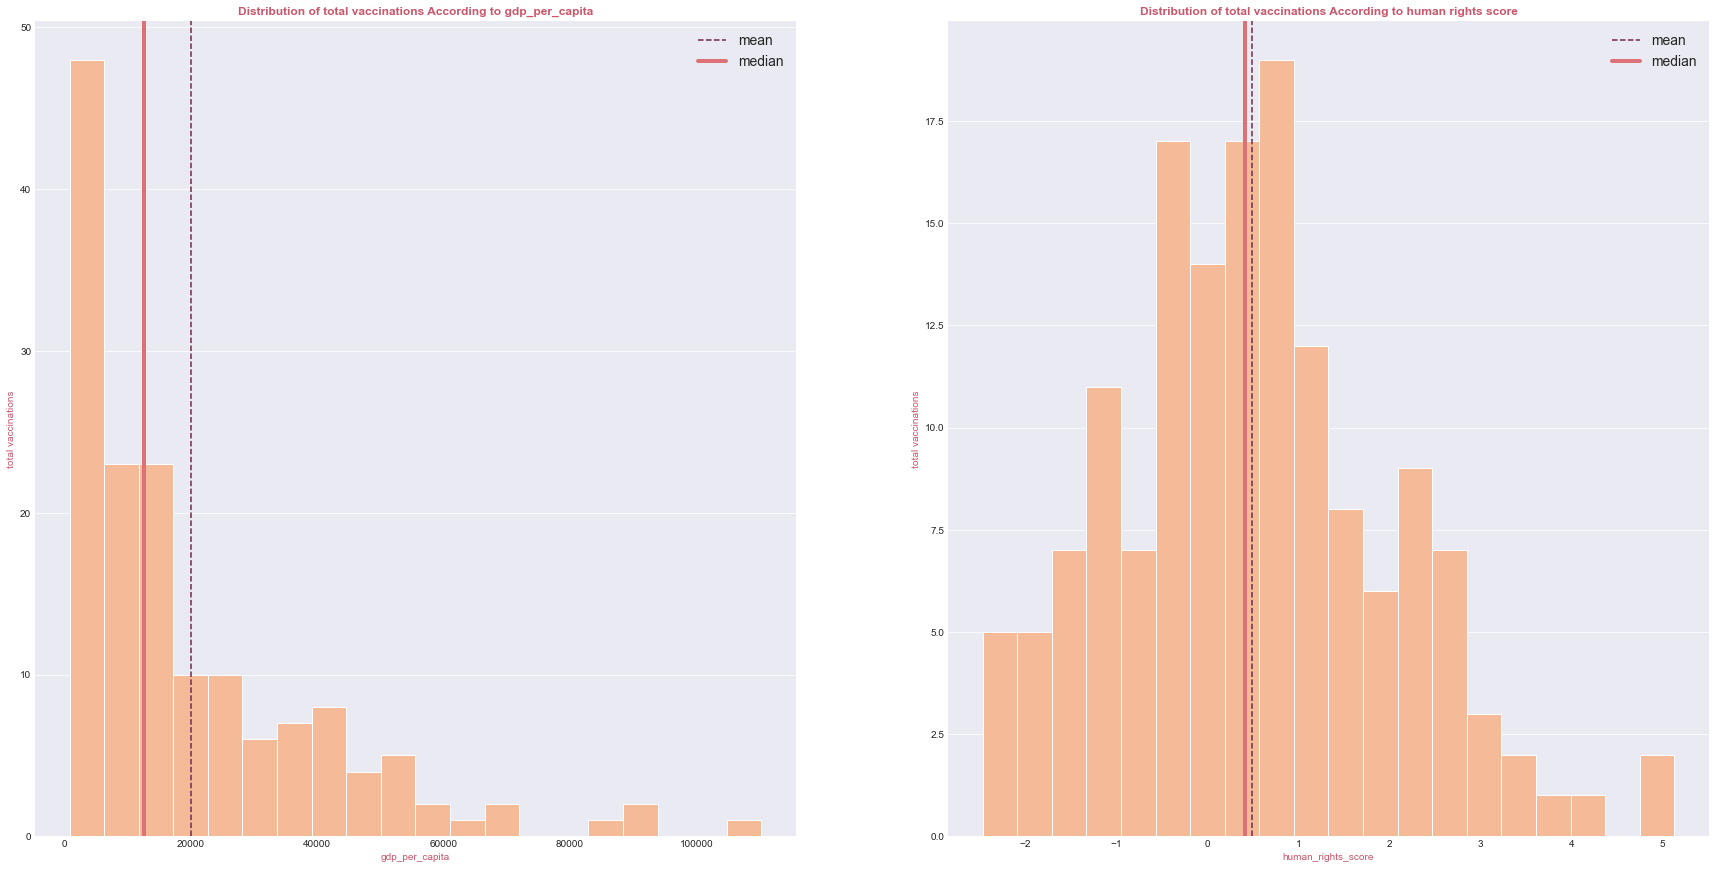

In [40]:
fig = plt.figure(figsize=(30, 15))

ax = fig.add_subplot(1,2,1)

prime_dataset['gdp_per_capita'].hist(bins=20, edgecolor='w', color='#f5ba98')

# gdp_per_capita
ax.set_title('Distribution of total vaccinations According to gdp_per_capita', color='#c8586c', fontweight='bold')
ax.set_xlabel('gdp_per_capita', color='#c8586c')
ax.set_ylabel('total vaccinations', color='#c8586c');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

ax.axvline(x=prime_dataset['gdp_per_capita'].mean(), color='#70284a', linestyle='--', label='mean')
ax.axvline(x=prime_dataset['gdp_per_capita'].median(), color='#dc7176', linewidth=4, label='median')
ax.legend(fontsize=14);

# human_rights_score
ax2 = fig.add_subplot(1,2,2)

prime_dataset['human_rights_score'].hist(bins=20, edgecolor='w', color='#f5ba98')

ax2.set_title('Distribution of total vaccinations According to human rights score', color='#c8586c', fontweight='bold')
ax2.set_xlabel('human_rights_score', color='#c8586c')
ax2.set_ylabel('total vaccinations', color='#c8586c');

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.grid(False)

ax2.axvline(x=prime_dataset['human_rights_score'].mean(), color='#70284a', linestyle='--', label='mean')
ax2.axvline(x=prime_dataset['human_rights_score'].median(), color='#dc7176', linewidth=4, label='median')
ax2.legend(fontsize=14);


In [41]:
byclass=prime_dataset.groupby('region')['political_regime'].value_counts().unstack()
byclass

political_regime,0,1,2,3
region,,,,
africa,2.0,19.0,15.0,1.0
arab states,4.0,4.0,1.0,NaN
asia,4.0,15.0,6.0,2.0
europe,NaN,6.0,15.0,19.0
middle east,6.0,5.0,NaN,NaN
north america,NaN,NaN,NaN,2.0
pacific,NaN,NaN,2.0,2.0
south america,NaN,4.0,16.0,3.0


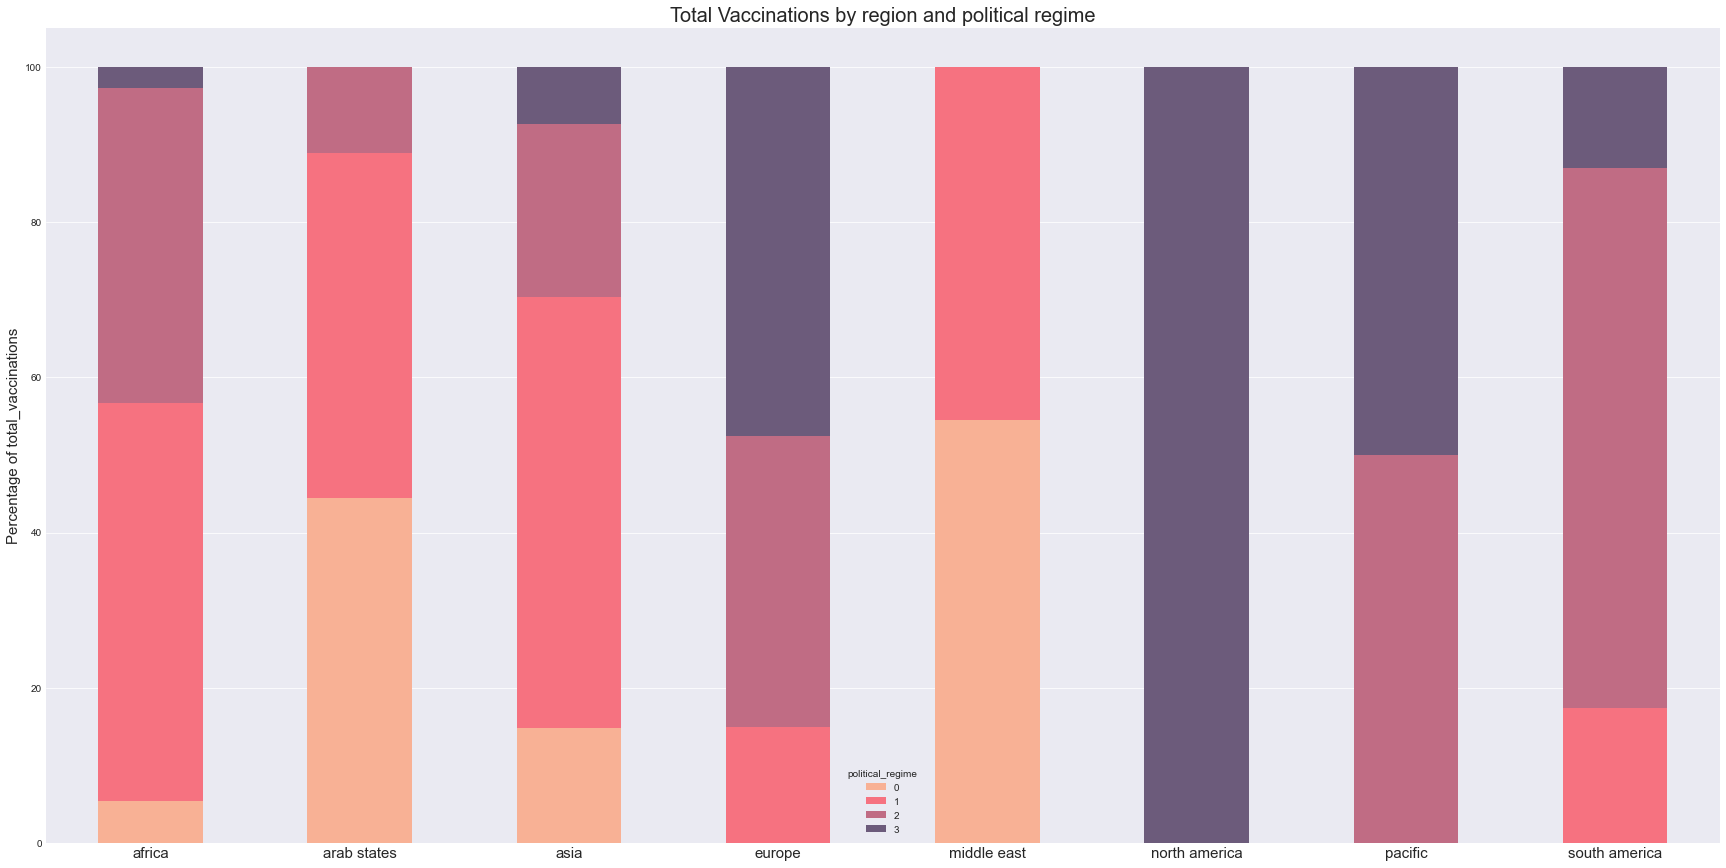

In [42]:
data = byclass.T / byclass.sum(axis=1) * 100
ax = data.T.plot(kind='bar', stacked=True, figsize=(30, 15), color=['#F8B195','#F67280','#C06C84','#6C5B7B'])

ax.set_title('Total Vaccinations by region and political regime', fontsize=20)
ax.set_xticklabels(["africa", "arab states", "asia","europe","middle east","north america","pacific","south america"], rotation=0, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Percentage of total_vaccinations', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False);

In [43]:
prime_dataset.sort_values(by='population',ascending=False)

,country,region,region_num,regime_type,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent
27,China,asia,3,closed autocracy,0,-1.298813,16410.797797,1440297825,83.60
59,India,asia,3,electoral autocracy,1,-1.394108,6118.357330,1382345085,43.92
146,United States,north america,7,liberal democracy,3,0.235333,60235.728492,331341050,61.51
60,Indonesia,asia,3,electoral democracy,2,-0.433937,11444.960683,274021604,41.46
105,Pakistan,asia,3,electoral autocracy,1,-1.581048,4622.770769,221612785,32.00
...,...,...,...,...,...,...,...,...,...
85,Malta,europe,5,electoral democracy,2,2.803174,39222.143351,441750,84.48
58,Iceland,europe,5,liberal democracy,3,4.937324,52279.728851,341628,82.69
149,Vanuatu,pacific,4,electoral democracy,2,2.312696,2762.791388,308337,16.03
11,Barbados,south america,8,liberal democracy,3,1.171229,12870.042504,287437,49.97


A:\programming_tools\Anaconda\envs\data-science-env\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x00000225CAAADF40> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


<Figure size 3600x3600 with 0 Axes>

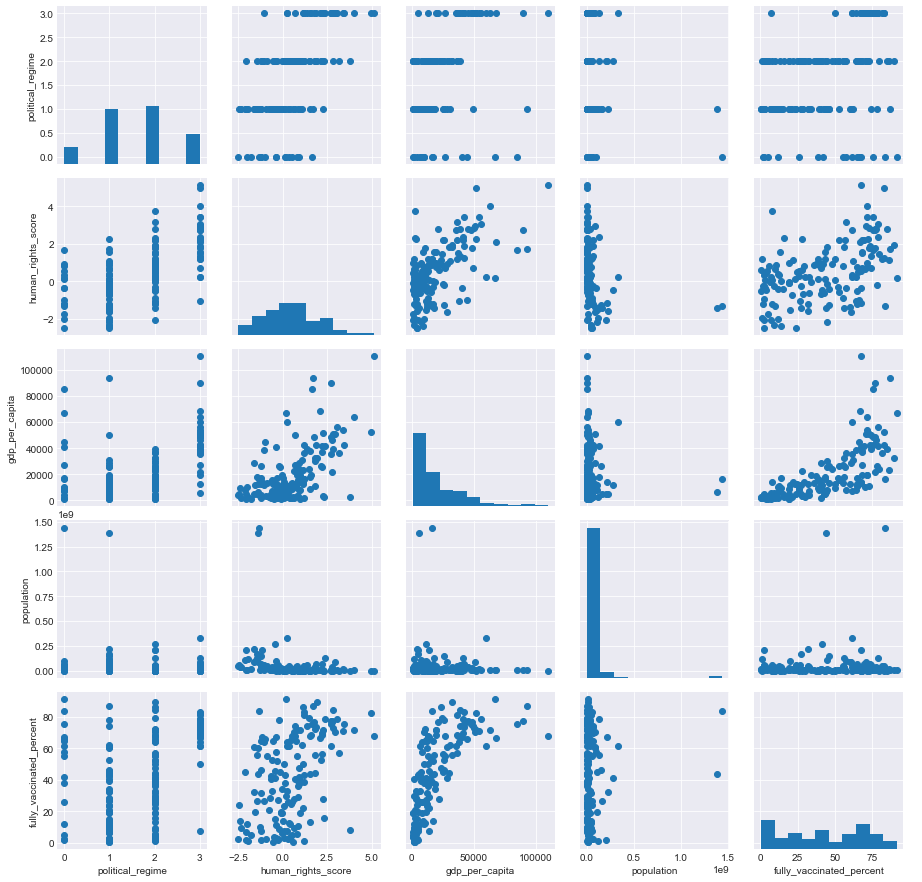

In [44]:
fig=plt.figure(figsize=(50,50))
graph = sns.PairGrid(prime_dataset)
# type of graph for diagonal
graph = graph.map_diag(plt.hist)
# type of graph for non-diagonal
graph = graph.map_offdiag(plt.scatter)
# to add legends
graph = graph.add_legend()
# to show
plt.show()

### *Scatterplots* 

### *Bar charts*

<AxesSubplot:xlabel='population', ylabel='region'>

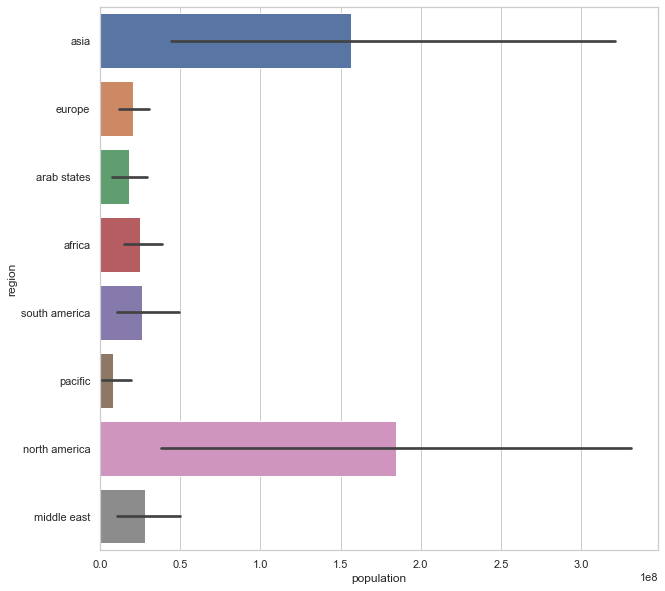

In [57]:
sns.set(style='whitegrid')
fig=plt.figure(figsize=(10,10))

sns.barplot(x="population", y="region", data=prime_dataset)

<AxesSubplot:xlabel='fully_vaccinated_percent', ylabel='regime_type'>

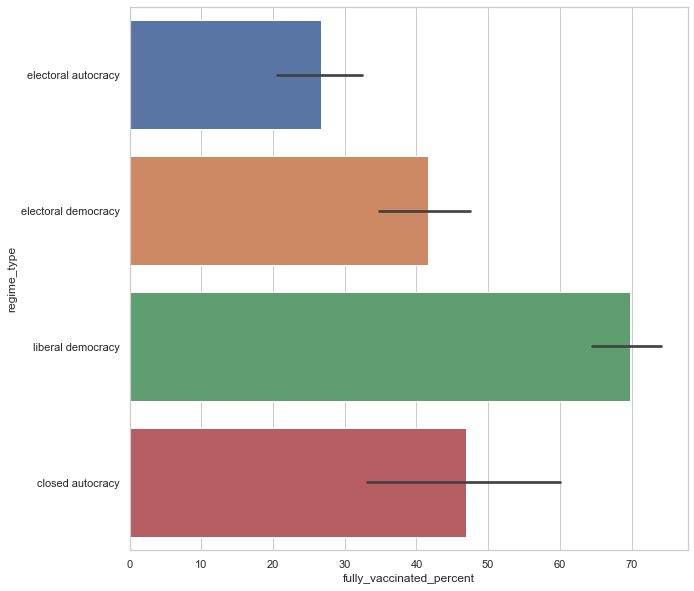

In [56]:
fig=plt.figure(figsize=(10,10))

sns.barplot(x="fully_vaccinated_percent", y="regime_type", data=prime_dataset)

### *Boxplots*

Text(0.5, 1.0, 'Total Vaccinations per Region Boxplot')

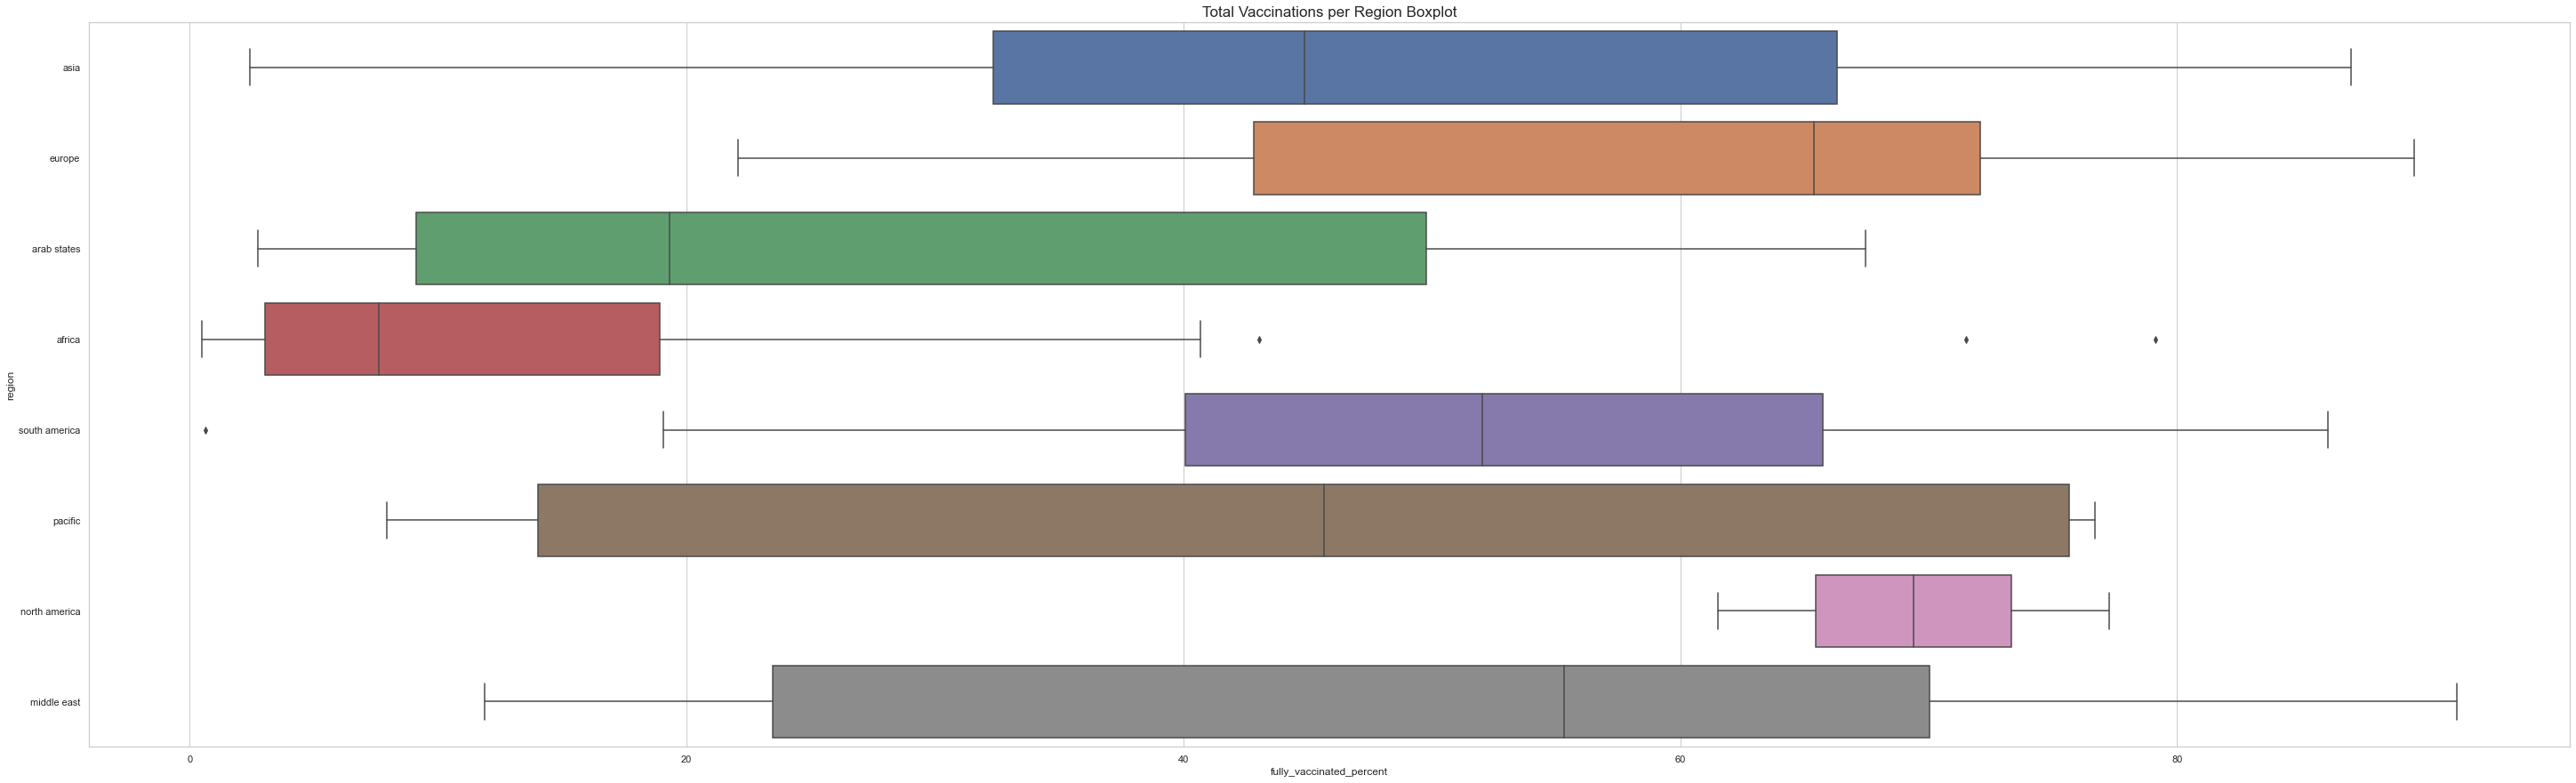

In [59]:
sns.set(style='whitegrid')

fig=plt.figure(figsize=(50,15))
ax=sns.boxplot(y=prime_dataset['region'], x=prime_dataset['fully_vaccinated_percent'])
ax.set_title('Total Vaccinations per Region Boxplot', fontsize=17)

Text(0.5, 1.0, 'Total Vaccinations per Regime Type Boxplot')

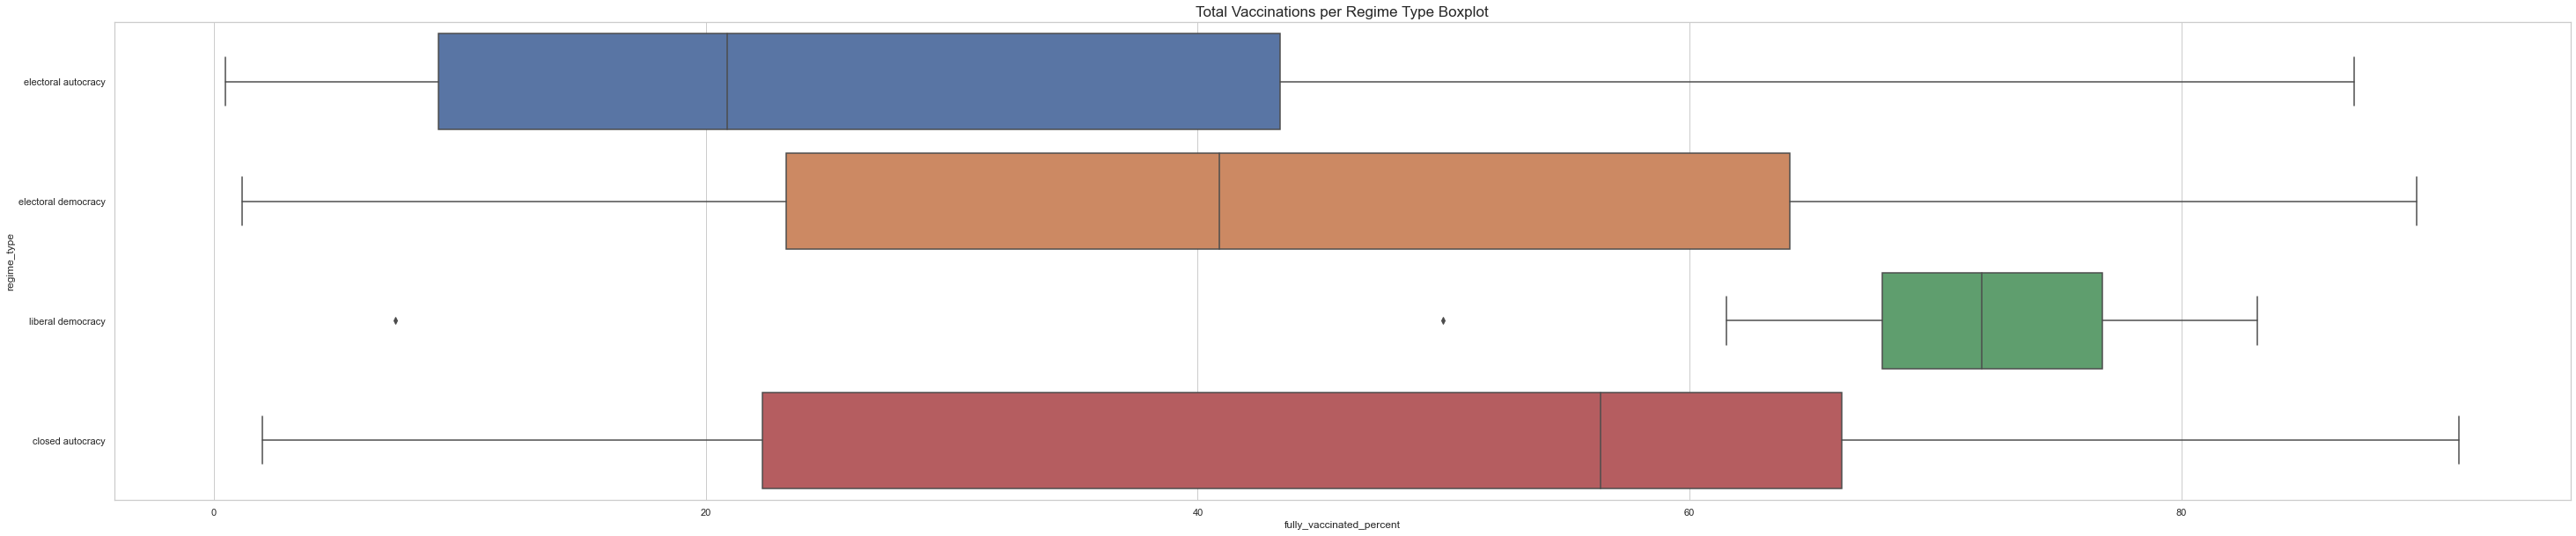

In [60]:
fig=plt.figure(figsize=(50,10))
ax=sns.boxplot(y=prime_dataset['regime_type'], x=prime_dataset['fully_vaccinated_percent'])
ax.set_title('Total Vaccinations per Regime Type Boxplot', fontsize=17)

In [ ]:
fig=plt.figure(figsize=(20,55))

ax=fig.add_subplot(421)

ax=sns.boxplot(data=prime_dataset['political_regime'], width=0.7)
ax.set_title('Political Regime Boxplot', fontsize=17)

ax2=fig.add_subplot(422)

ax2=sns.boxplot(data=prime_dataset['gdp'], width=0.7)
ax2.set_title('GDP Boxplot', fontsize=17)

ax3=fig.add_subplot(423)

ax3=sns.boxplot(data=prime_dataset['human_rights_score'], width=0.7)
ax3.set_title('human rights score Boxplot', fontsize=17)

ax4=fig.add_subplot(424)

ax4=sns.boxplot(data=prime_dataset['population'], width=0.7)
ax4.set_title('population Boxplot', fontsize=17)

ax5=fig.add_subplot(425)

ax5=sns.boxplot(data=prime_dataset['total_vaccinations'], width=0.7)
ax5.set_title('Total Vaccinations Boxplot', fontsize=17)

ax6=fig.add_subplot(426)

ax6=sns.boxplot(data=prime_dataset['fully_vaccinated'], width=0.7)
ax6.set_title('fully_vaccinated Boxplot', fontsize=17)

ax7=fig.add_subplot(427)

ax7=sns.boxplot(data=prime_dataset['region_num'], width=0.7)
ax7.set_title('region_num Boxplot', fontsize=17)

plt.show()